In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [3]:
#load the dataset
data = pd.read_csv('green_tech_data.csv')

In [4]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [5]:
#check null values
data.isnull().sum()

,0
carbon_emissions,0
energy_output,0
renewability_index,0
cost_efficiency,0
sustainability,0


In [9]:
#check data is balanced or not
data['sustainability'].value_counts()  #85 not balanced and 15 are balanced


,count
sustainability,
0,85
1,15


In [10]:
data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


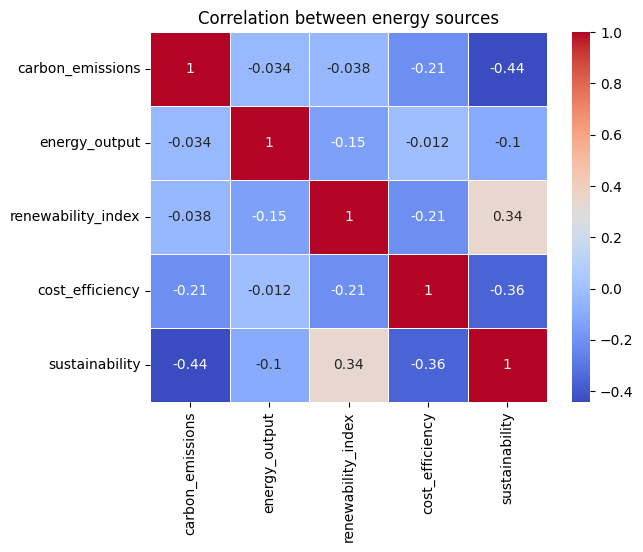

In [11]:
#heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Correlation between energy sources')
plt.show()

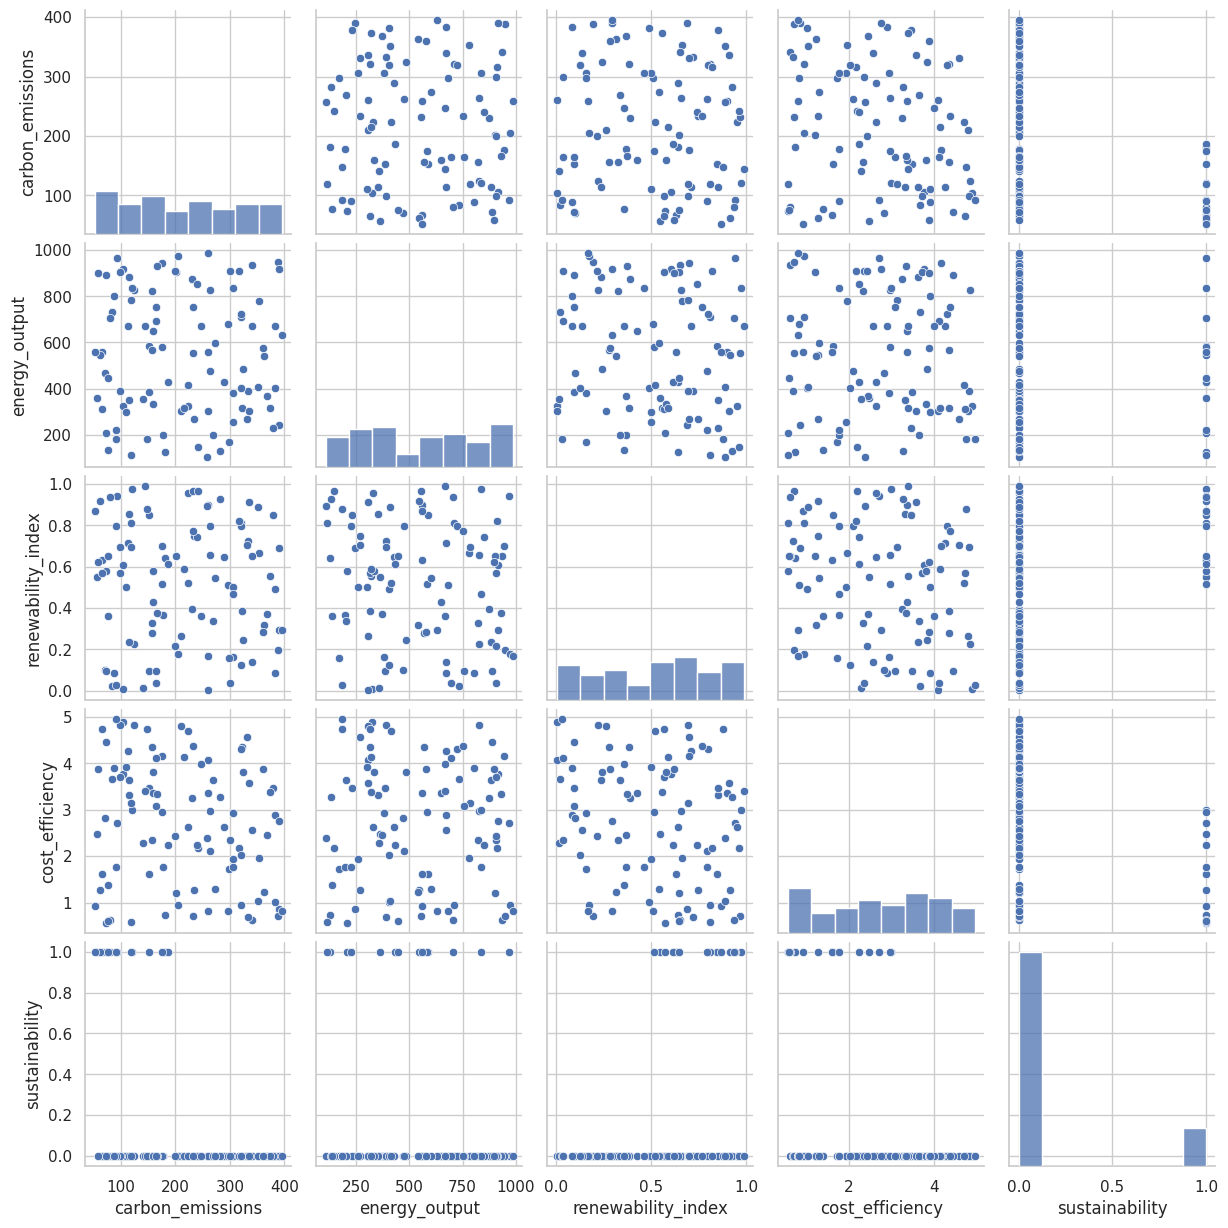

In [14]:
#pairplot with good color
sns.set(style='whitegrid')
sns.pairplot(data)

In [32]:
X = data[['carbon_emissions','renewability_index','cost_efficiency']]
y = data['sustainability'] # target variable

In [44]:
#split the data into training and testing data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

In [45]:
X_train.head()

,carbon_emissions,renewability_index,cost_efficiency
49,114.699059,0.853009,3.316370
34,387.971212,0.195243,0.707012
7,353.161651,0.663502,1.953304
95,222.828459,0.522243,4.688408
27,229.982053,0.393098,3.252743


In [46]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test)


In [48]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
accuracy_score(y_test,y_pred)

0.95

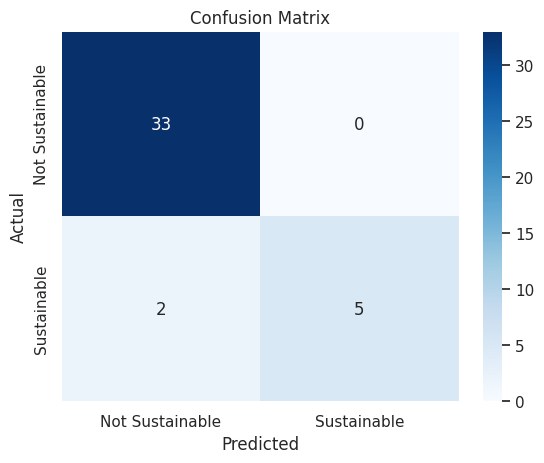

In [51]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sustainable', 'Sustainable'],
            yticklabels=['Not Sustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
#classification Report
print(classification_report(y_test,y_pred,target_names = ['Not Sustainable','Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        33
    Sustainable       1.00      0.71      0.83         7

       accuracy                           0.95        40
      macro avg       0.97      0.86      0.90        40
   weighted avg       0.95      0.95      0.95        40



In [53]:
#Feature Importance
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.017791
renewability_index     0.712932
cost_efficiency       -1.230857


In [56]:
import joblib
#save model to a file
joblib.dump(model,'model_logistic_reg.pkl')

['model_logistic_reg.pkl']

In [57]:
model = joblib.load('model_logistic_reg.pkl')

In [58]:

ip_data = np.array([[22.49,0.85,0.72]])


In [61]:
prediction = model.predict(ip_data)
print("Prediction:", prediction)

Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
